In [56]:
import pandas as pd
import numpy as np
import gzip
import os
import anndata as ad
import sys
import matplotlib
import scanpy as sc

3.6.0


In [57]:
#importing the aligned sequencing data by reading the names of all the sequencing files. This only works if the folder only contains
#sequencing files.
#this is the directory to where the data is stored.
dir_path = str(r'C:\Users\Qilin Zhao\Desktop\PVT_seq\data')
res = []
for path in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)


['CRLY-03_S3_Mmusculus_Mmusculus_seqlev_d2_dge.txt', 'CRLY-29_S7_Mmusculus_Mmusculus_seqlev_d2_dge.txt', 'CRLY-30_S8_Mmusculus_Mmusculus_seqlev_d2_dge.txt', 'CRLY-33_S4_Mmusculus_Mmusculus_seqlev_d2_dge.txt', 'CRLY-35_S9_Mmusculus_Mmusculus_seqlev_d2_dge.txt', 'CRLY-36_S10_Mmusculus_Mmusculus_seqlev_d2_dge.txt']


In [125]:
#Actually reading the content of each file.
matrices = []
for i in res:
    print(i)
    matrices.append(sc.read_text(r'C:\Users\Qilin Zhao\Desktop\PVT_seq\data\\'+i).T) #directory of cell labels.

CRLY-03_S3_Mmusculus_Mmusculus_seqlev_d2_dge.txt
CRLY-29_S7_Mmusculus_Mmusculus_seqlev_d2_dge.txt
CRLY-30_S8_Mmusculus_Mmusculus_seqlev_d2_dge.txt
CRLY-33_S4_Mmusculus_Mmusculus_seqlev_d2_dge.txt
CRLY-35_S9_Mmusculus_Mmusculus_seqlev_d2_dge.txt
CRLY-36_S10_Mmusculus_Mmusculus_seqlev_d2_dge.txt


In [126]:
#import whole cell population identity from previous publicaitons.

annotations = pd.read_csv(r"C:\Users\Qilin Zhao\Desktop\PVT_seq\whole_population_identity.txt", sep = '_|\t', names =['sequence', 'sample', 'cell_type'])
#annotations.sort_index(inplace=True)

C:\Users\Qilin Zhao\AppData\Local\Temp\ipykernel_21024\3496773124.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  annotations = pd.read_csv(r"C:\Users\Qilin Zhao\Desktop\PVT_seq\whole_population_identity.txt", sep = '_|\t', names =['sequence', 'sample', 'cell_type'])


In [297]:
#combine the files into a single file for further processing. This is combining sequencing data from all animals into one.
reads = ad.concat(matrices, axis=0)

C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [298]:
#pre processing:
#1. showcase tags for each cell in single cell sequencing
reads.obs

""
ATCAATCCTATCTGC
CTAACACCTGGCTCG
ACTGAACATCTCGAA
CAAGCACACGTGTCC
TTGGAGTCAACGCGG
...
GCAATACAACTGCGG
GGTGCTCACGATTGG
TAAGATCGAATTCGG
GTACGATGCTAGCGG


In [299]:
#filter out cells with number of gene <980 & genes expressed in less than 3 cells.
#this incrases the validity of single-cell sequencing data
sc.pp.filter_cells(reads, min_genes = 980)
sc.pp.filter_genes(reads, min_cells = 3)


C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\anndata\_core\anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [300]:
#rename index to sequence
reads.obs.reset_index(inplace=True)
reads.obs
reads.obs = reads.obs.rename(columns={'index':'sequence'})

In [301]:
reads.obs['cell_type'] = annotations['cell_type']

In [302]:
#each tag sequence is now coupled with a specific cell
reads.obs

,sequence,n_genes,cell_type
0,ATCAATCCTATCTGC,9622,Neuron1
1,CTAACACCTGGCTCG,2170,Astrocyte
2,ACTGAACATCTCGAA,2682,Astrocyte
3,CAAGCACACGTGTCC,1979,Astrocyte
4,TTGGAGTCAACGCGG,1038,Endothelial
...,...,...,...
2064,TTCAGTGAAGGCGAA,2388,Pericyte
2065,ACCACGATAATCAGT,1014,Astrocyte
2066,TACCGCGGAGGAGAA,1602,Pericyte
2067,GGTGCTCACGATTGG,9804,Neuron6


In [303]:
#counting the amount of mitochondrial genes in the sequencing data. Remove these genes because they are not our interests.
reads.var['mt'] = reads.var_names.str.startswith('MT-')

In [305]:
sc.pp.calculate_qc_metrics(reads, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

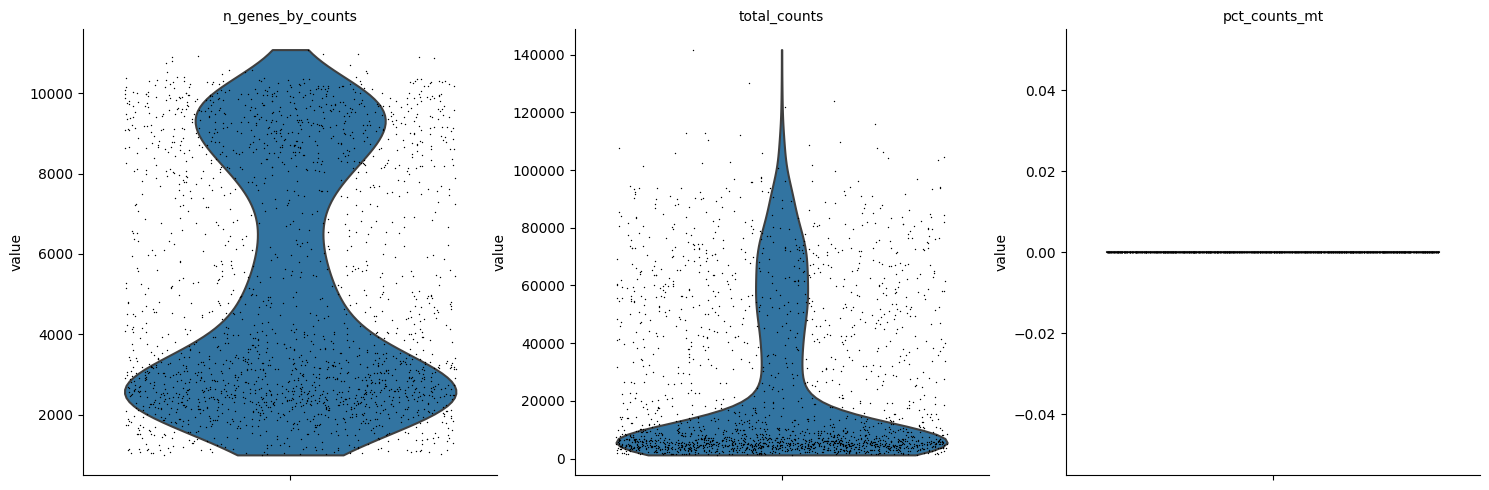

In [306]:
#show statistics of the number of reads in each cell and the total number of reads and the number of mitochondrial genes to make sure
#the data has been cleaned well.
sc.pl.violin(reads, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

In [307]:
#normalize and calculate the log of the data.
sc.pp.normalize_total(reads, target_sum = 1e4)

In [308]:
sc.pp.log1p(reads)

In [309]:
#find highly variable genes for clusters
sc.pp.highly_variable_genes(reads)
reads = reads[:, reads.var.highly_variable]

In [310]:
#sc.pp.regress_out(reads, ['total_counts', 'pct_counts_mt'])

In [311]:
sc.pp.scale(reads, max_value=10)

C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [312]:
sc.tl.pca(reads, svd_solver='arpack')

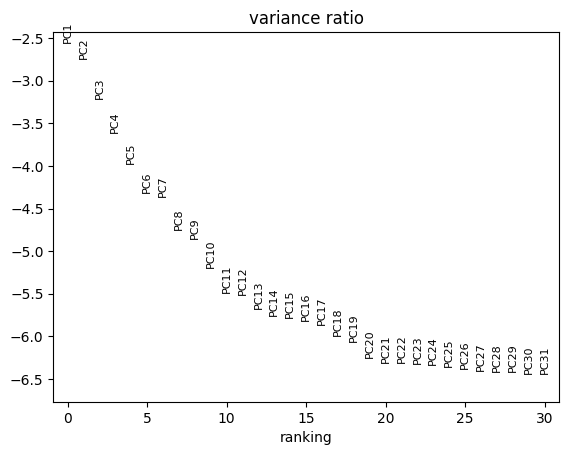

In [313]:
#this shows how many principle components are required to caputer the most variance of the dataset.
sc.pl.pca_variance_ratio(reads, log=True)

C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:364: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


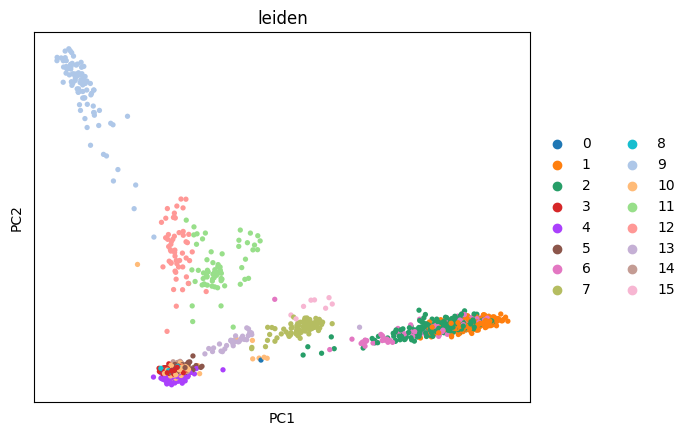

In [326]:
#cluster the cell type based on the dimension reduced data and show their distributions.
sc.pp.neighbors(reads, n_neighbors=40, n_pcs=20)
sc.pl.pca(reads, color=['leiden'])

C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:364: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


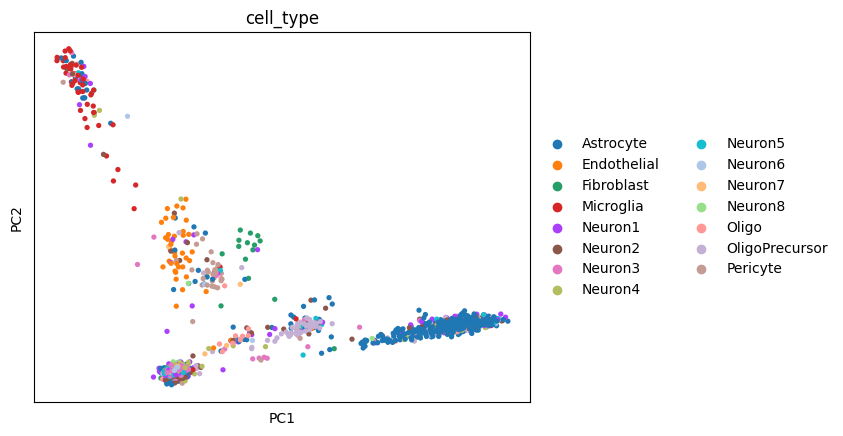

In [327]:
#Using the provided cell labels to verify the validity of previous clustering, and see if these clusters areperserved.
sc.pl.pca(reads, color=['cell_type'])

C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:419: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
C:\Users\Qilin Zhao\anaconda3\Lib\site-p

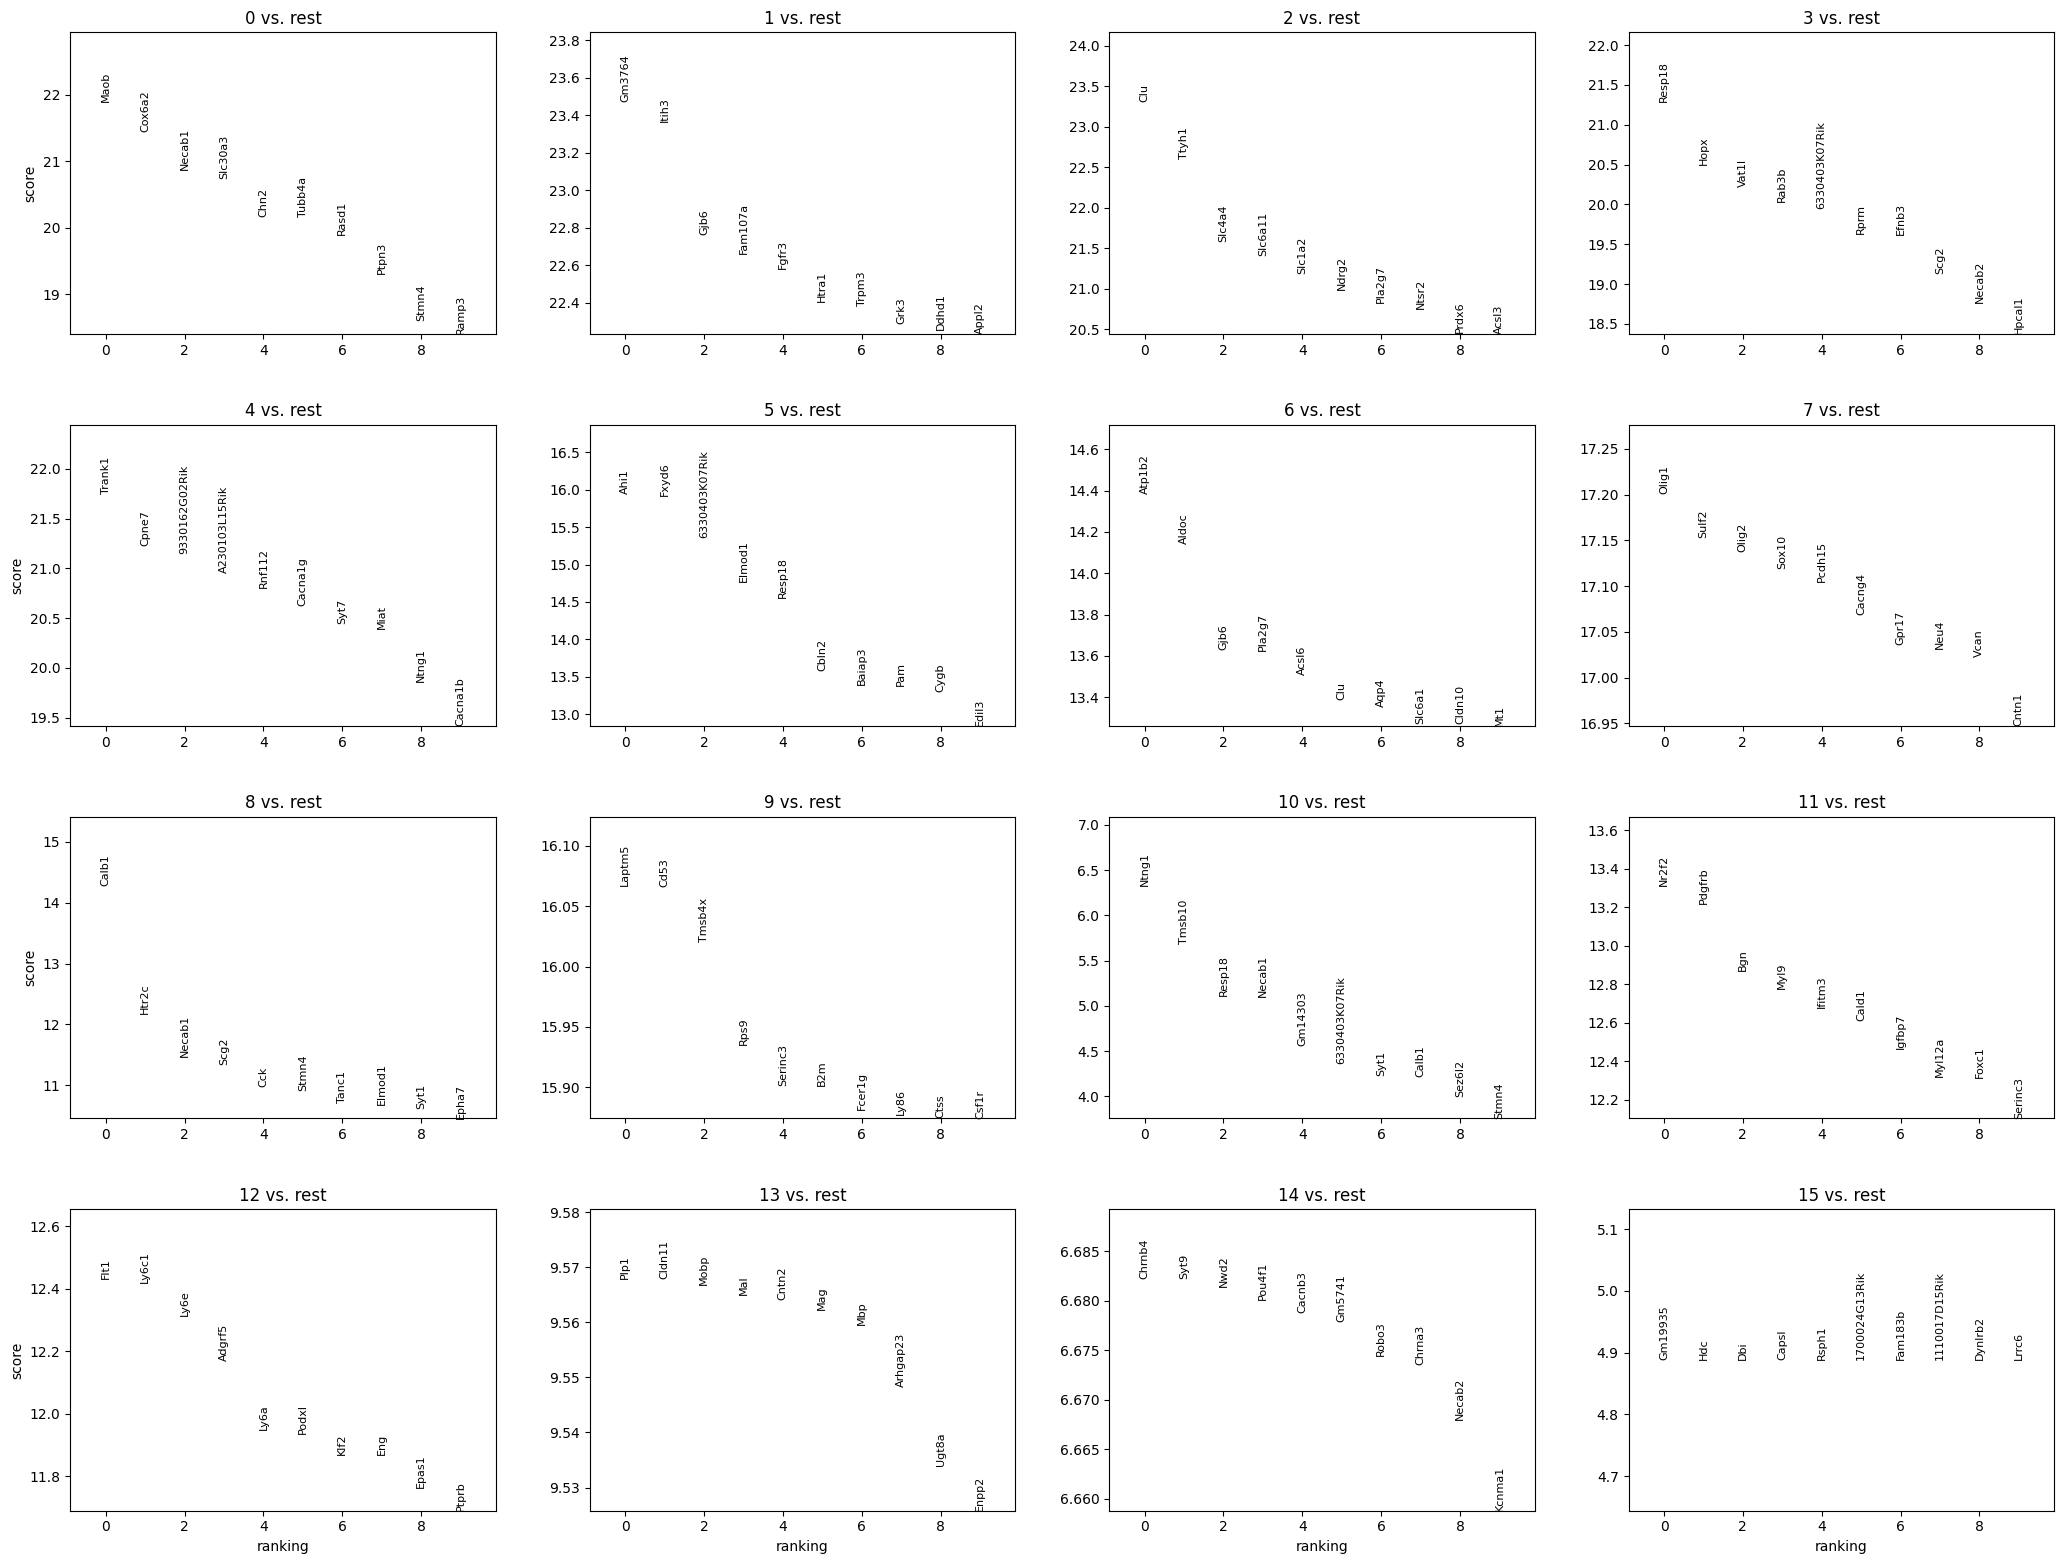

In [329]:
#find highly variable genes among each cluster
#We showed the top 10 differentially expressed genes in each cell clusters.
sc.tl.rank_genes_groups(reads, groupby='leiden', n_genes=10, method = 'wilcoxon')
sc.pl.rank_genes_groups(reads, n_genes = 10, sharey=False)

In [320]:
#print out the 10 most differentially expressed genes in each cluster.
reads.uns['rank_genes_groups']['names']

rec.array([('Maob', 'Gm3764', 'Clu', 'Resp18', 'Trank1', 'Ahi1', 'Atp1b2', 'Olig1', 'Calb1', 'Laptm5', 'Ntng1', 'Nr2f2', 'Flt1', 'Plp1', 'Chrnb4', 'Gm19935'),
           ('Cox6a2', 'Itih3', 'Ttyh1', 'Hopx', 'Cpne7', 'Fxyd6', 'Aldoc', 'Sulf2', 'Htr2c', 'Cd53', 'Tmsb10', 'Pdgfrb', 'Ly6c1', 'Cldn11', 'Syt9', 'Hdc'),
           ('Necab1', 'Gjb6', 'Slc4a4', 'Vat1l', '9330162G02Rik', '6330403K07Rik', 'Gjb6', 'Olig2', 'Necab1', 'Tmsb4x', 'Resp18', 'Bgn', 'Ly6e', 'Mobp', 'Nwd2', 'Dbi'),
           ('Slc30a3', 'Fam107a', 'Slc6a11', 'Rab3b', 'A230103L15Rik', 'Elmod1', 'Pla2g7', 'Sox10', 'Scg2', 'Rps9', 'Necab1', 'Myl9', 'Adgrf5', 'Mal', 'Pou4f1', 'Capsl'),
           ('Chn2', 'Fgfr3', 'Slc1a2', '6330403K07Rik', 'Rnf112', 'Resp18', 'Acsl6', 'Pcdh15', 'Cck', 'Serinc3', 'Gm14303', 'Ifitm3', 'Ly6a', 'Cntn2', 'Cacnb3', 'Rsph1'),
           ('Tubb4a', 'Htra1', 'Ndrg2', 'Rprm', 'Cacna1g', 'Cbln2', 'Clu', 'Cacng4', 'Stmn4', 'B2m', '6330403K07Rik', 'Cald1', 'Podxl', 'Mag', 'Gm5741', '1700024G13Rik'),
   

In [322]:
#for specific gene of interests, we will score the expression of this gene in each specific cell, then plot out the score in the previous
#clustering. Here we show the distribution of gene Calb1
sc.tl.score_genes(reads, ['Calb1'], score_name='Gene: Calb1')

C:\Users\Qilin Zhao\anaconda3\Lib\site-packages\scanpy\tools\_score_genes.py:152: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


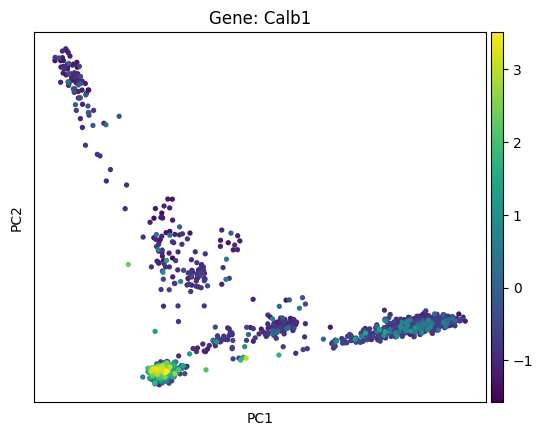

In [328]:
#reads.obs
sc.pl.pca(reads, color='Gene: Calb1')